In [76]:
import pandas as pd

# Load dataset
df_raw = pd.read_csv("E:\\J P Morgan Quantitative Research\\Nat_Gas.csv")
print(df_raw.head())


      Dates  Prices
0  10/31/20    10.1
1  11/30/20    10.3
2  12/31/20    11.0
3   1/31/21    10.9
4   2/28/21    10.9


In [78]:
df = pd.read_csv("E:\\J P Morgan Quantitative Research\\Nat_Gas.csv", parse_dates=['Dates'])
df.set_index('Dates', inplace=True)
df = df.sort_index()
print(df.head())


            Prices
Dates             
2020-10-31    10.1
2020-11-30    10.3
2020-12-31    11.0
2021-01-31    10.9
2021-02-28    10.9


C:\Users\Ahmad Reza\AppData\Local\Temp\ipykernel_18624\88866067.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv("E:\\J P Morgan Quantitative Research\\Nat_Gas.csv", parse_dates=['Dates'])


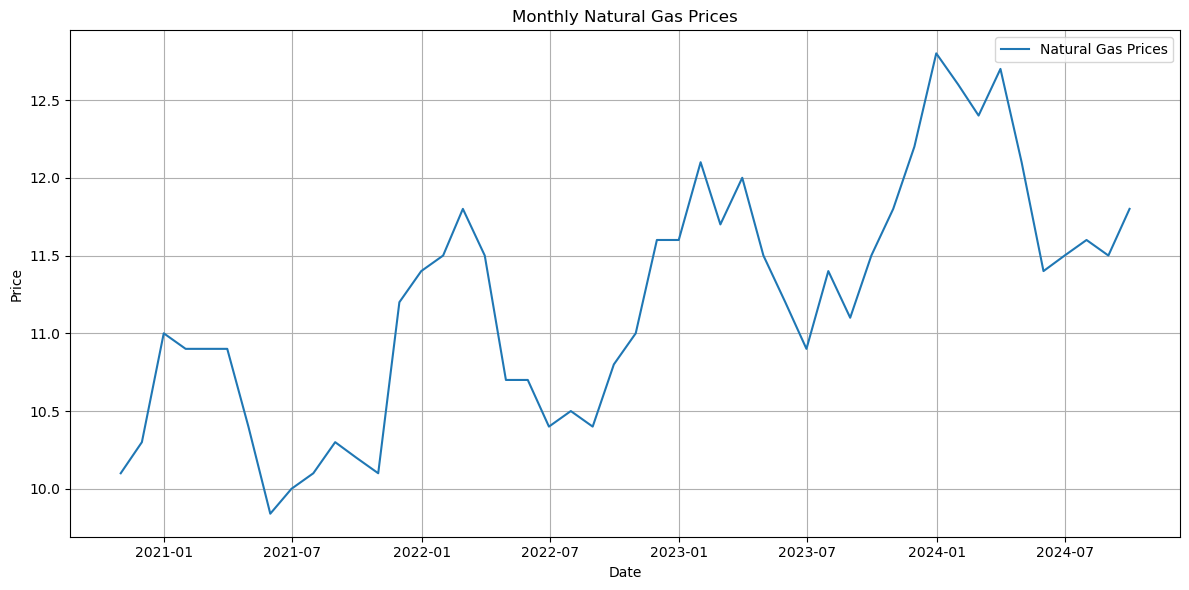

In [112]:
plt.figure(figsize=(12,6))
plt.plot(df['Prices'], label='Natural Gas Prices')
plt.title('Monthly Natural Gas Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

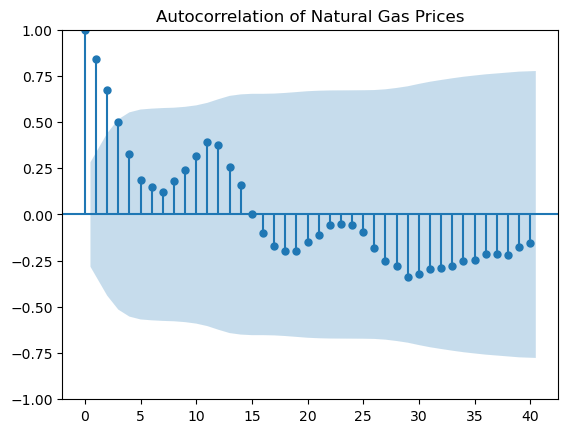

In [120]:
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(df['Prices'].dropna(), lags=40)
plt.title('Autocorrelation of Natural Gas Prices')
plt.show()

In [122]:
df = df.resample('M').mean()  # Average monthly, fills in missing months
df['Prices'] = df['Prices'].interpolate()  # Interpolate missing values

print(df.info())  # This should now show 0 missing values


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 48 entries, 2020-10-31 to 2024-09-30
Freq: ME
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Prices  48 non-null     float64
dtypes: float64(1)
memory usage: 768.0 bytes
None


C:\Users\Ahmad Reza\AppData\Local\Temp\ipykernel_18624\3565591005.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df = df.resample('M').mean()  # Average monthly, fills in missing months


In [132]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import matplotlib.pyplot as plt

# Fit the model
model = ExponentialSmoothing(
    df['Prices'],
    trend='add',
    seasonal='add',
    seasonal_periods=12
)
fit = model.fit()

# Forecast the next 15 months
forecast = fit.forecast(15)


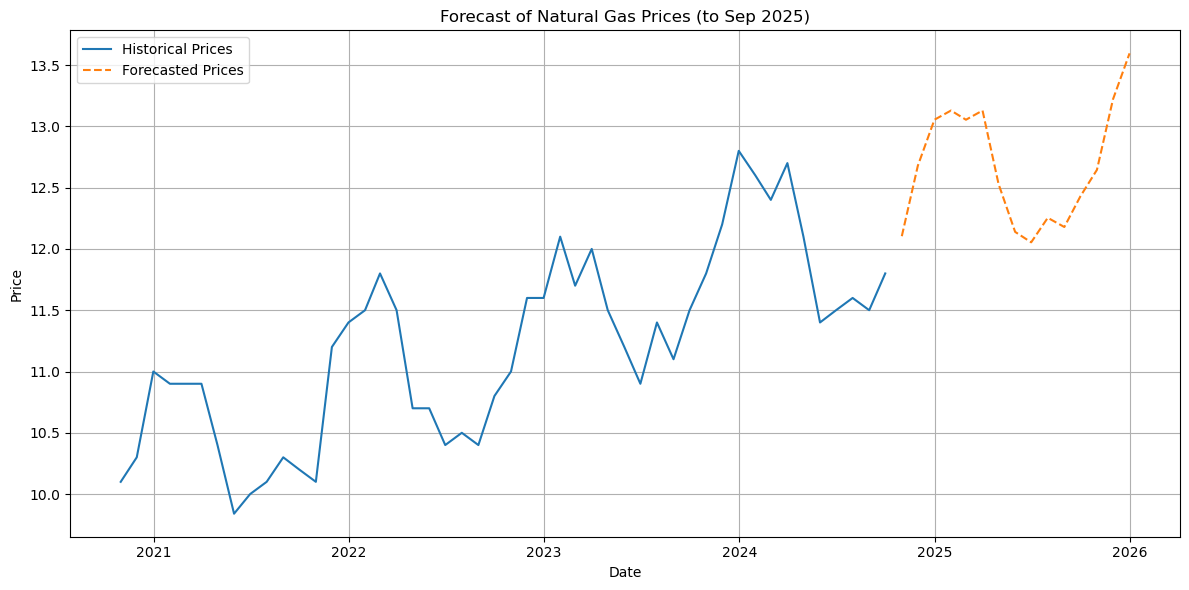

In [130]:
# Plot historical + forecasted values
plt.figure(figsize=(12,6))
plt.plot(df.index, df['Prices'], label='Historical Prices')
plt.plot(forecast.index, forecast.values, label='Forecasted Prices', linestyle='--')
plt.title('Forecast of Natural Gas Prices (to Sep 2025)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [136]:
train = df['Prices'][:-15]  # All but last 12 months
test = df['Prices'][-15:]   # Last 12 months for evaluation

In [138]:
print(forecast)

2024-10-31    12.103782
2024-11-30    12.678810
2024-12-31    13.053791
2025-01-31    13.128799
2025-02-28    13.053792
2025-03-31    13.128793
2025-04-30    12.528778
2025-05-31    12.138793
2025-06-30    12.053781
2025-07-31    12.253789
2025-08-31    12.178798
2025-09-30    12.428808
2025-10-31    12.645300
2025-11-30    13.220328
2025-12-31    13.595309
Freq: ME, dtype: float64


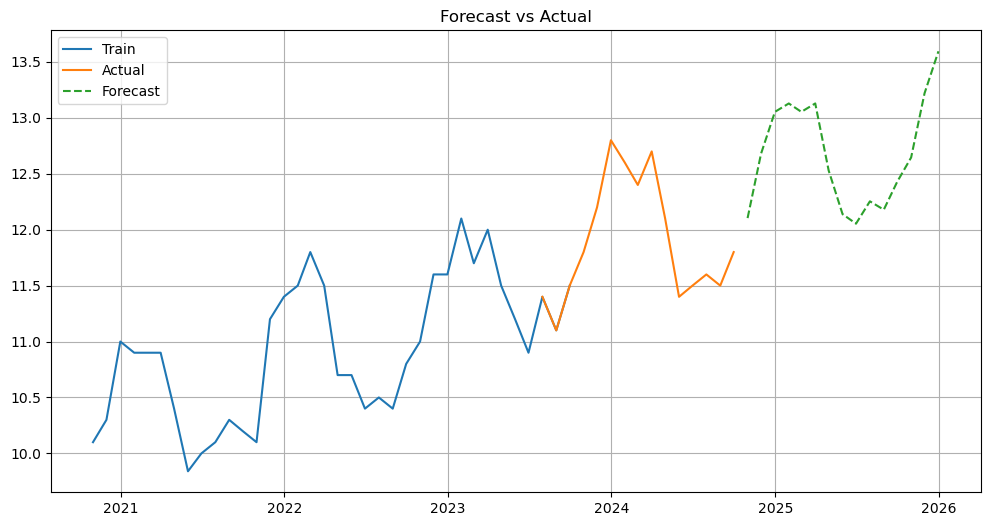

In [104]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Actual')
plt.plot(forecast.index, forecast, label='Forecast', linestyle='--')
plt.legend()
plt.title('Forecast vs Actual')
plt.grid(True)
plt.show()


In [110]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

mae = mean_absolute_error(test, forecast)
rmse = np.sqrt(mean_squared_error(test, forecast))
mape = np.mean(np.abs((test - forecast) / test)) * 100

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAPE: {mape:.2f}%")


MAE: 0.92
RMSE: 1.07
MAPE: nan%
